## Plotting VHG plots for Piezometers and Groundwater Wells

Importing libraries and data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# piezometers
PAB = pd.read_csv('VHG_B-A_2023.csv', parse_dates=[1])
PBC = pd.read_csv('VHG_C-B_2023.csv', parse_dates=[1])
# get rid of the first column
PAB = PAB.iloc[:, 1:]
PBC = PBC.iloc[:, 1:]

# groundwater wells and surface water
directory = 'C:/Users/huck4481/Documents/GitHub/sediment_trap_paper/VHG_plots/gw_data'
WSE_dict = {}

for filename in os.listdir(directory): # iterate over all files in GW_and_Piezos folder
    if filename.endswith('.csv'): # checking if its a csv
        # construct the full file path
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])
        # remove the '.csv' from the filename to use as the dictionary key
        key = filename[:-4]
        # store the data frame in the dictionary
        WSE_dict[key] = df

Plot Piezometer VHG

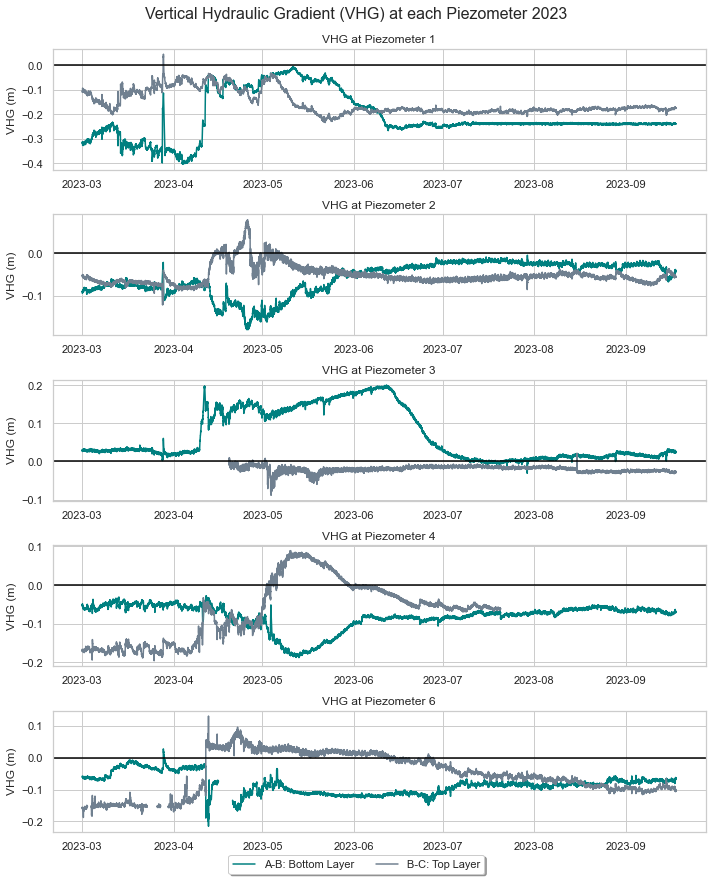

In [2]:
sns.set_theme(style='whitegrid')
fig, axs = plt.subplots(5, figsize=(10, 12))
fig.patch.set_facecolor('white')

piezometers = [1, 2, 3, 4, 6]  # Skip P5

for i, ax in enumerate(axs):
    ax.plot(PAB['Date_Time'], PAB[f'P{piezometers[i]}'], label='A-B: Bottom Layer', color='teal')
    ax.plot(PBC['Date_Time'], PBC[f'P{piezometers[i]}'], label='B-C: Top Layer', color='slategray')

    # Set the title and labels
    ax.set_title(f'VHG at Piezometer {piezometers[i]}')
    # ax.set_xlabel('Time')
    ax.set_ylabel('VHG (m)')
    ax.grid(True)
    ax.axhline(0, color='black')

# Manually create a legend
handles = [
    plt.Line2D([0], [0], color='teal', label='A-B: Bottom Layer'),
    plt.Line2D([0], [0], color='slategray', label='B-C: Top Layer'),
]
# Add the legend 
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncol=2)

fig.suptitle('Vertical Hydraulic Gradient (VHG) at each Piezometer 2023', fontsize=16, y=0.99)
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.savefig('plots/VHG_2023_paper.jpg', dpi=700, bbox_inches='tight')
plt.show()

Plot GW and SW Elevations

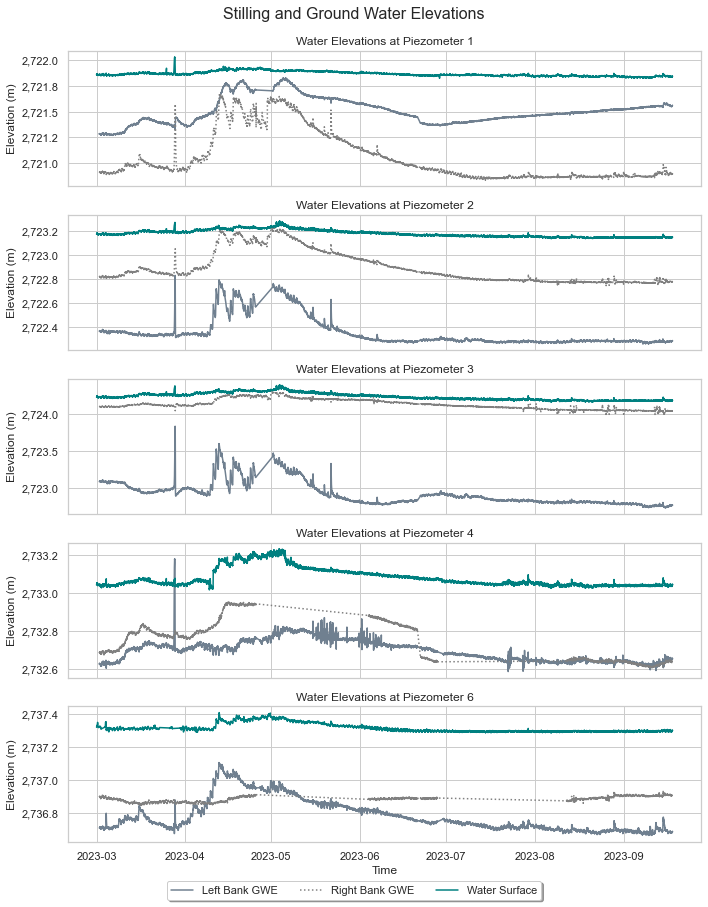

In [3]:
# Set Seaborn style
sns.set_theme(style="whitegrid", palette="pastel")

# Create subplots with a white background
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12), sharex=True, facecolor='white')

# Plot for Location at P1
sns.lineplot(data=WSE_dict['GW_down_left_2023'], x='Date_Time', y='P1', color='slategray', linestyle='-', ax=axes[0])
sns.lineplot(data=WSE_dict['GW_down_right_2023'], x='Date_Time', y='P1', color='gray', linestyle=':', ax=axes[0])
sns.lineplot(data=WSE_dict['P1C_23_WSE'], x='Date_Time', y='WSE', color='teal', ax=axes[0])
axes[0].set_title('Water Elevations at Piezometer 1')
axes[0].set_ylabel('Elevation (m)')
axes[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) 

# Plot for Location at P2
sns.lineplot(data=WSE_dict['GW_down_left_2023'], x='Date_Time', y='P2', color='slategray', linestyle='-', ax=axes[1])
sns.lineplot(data=WSE_dict['GW_down_right_2023'], x='Date_Time', y='P2', color='gray', linestyle=':', ax=axes[1])
sns.lineplot(data=WSE_dict['P2C_23_WSE'], x='Date_Time', y='WSE', color='teal', ax=axes[1])
axes[1].set_title('Water Elevations at Piezometer 2')
axes[1].set_ylabel('Elevation (m)')
axes[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) 

# Plot for Location at P3
sns.lineplot(data=WSE_dict['GW_down_left_2023'], x='Date_Time', y='P3', label='Left Bank GWE', color='slategray', linestyle='-', ax=axes[2], legend=False)
sns.lineplot(data=WSE_dict['GW_down_right_2023'], x='Date_Time', y='P3', label='Right Bank GWE', color='gray', linestyle=':', ax=axes[2], legend=False)
sns.lineplot(data=WSE_dict['P3C_23_WSE'], x='Date_Time', y='WSE', label='Water Surface', color='teal', ax=axes[2], legend=False)
axes[2].set_title('Water Elevations at Piezometer 3')
axes[2].set_ylabel('Elevation (m)')
axes[2].set_xlabel('Time')
axes[2].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) 

# Plot for Location at P4
sns.lineplot(data=WSE_dict['GW_up_left_2023'], x='Date_Time', y='P4', color='slategray', linestyle='-', ax=axes[3])
sns.lineplot(data=WSE_dict['GW_up_right_2023'], x='Date_Time', y='P4', color='gray', linestyle=':', ax=axes[3])
sns.lineplot(data=WSE_dict['P4C_23_WSE'], x='Date_Time', y='WSE', color='teal', ax=axes[3])
axes[3].set_title('Water Elevations at Piezometer 4')
axes[3].set_ylabel('Elevation (m)')
axes[3].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) 

# Plot for Location at P6
sns.lineplot(data=WSE_dict['GW_up_left_2023'], x='Date_Time', y='P6', color='slategray', linestyle='-', ax=axes[4], legend=False)
sns.lineplot(data=WSE_dict['GW_up_right_2023'], x='Date_Time', y='P6', color='gray', linestyle=':', ax=axes[4], legend=False)
sns.lineplot(data=WSE_dict['P6C_23_WSE'], x='Date_Time', y='WSE', color='teal', ax=axes[4], legend=False)
axes[4].set_title('Water Elevations at Piezometer 6')
axes[4].set_ylabel('Elevation (m)')
axes[4].set_xlabel('Time')
axes[4].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) 

# Adjust layout
plt.tight_layout()
fig.suptitle('Stilling and Ground Water Elevations', fontsize=16, y=1.02)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncol=3)
plt.savefig('plots/GW_elevations.jpg', dpi=900, bbox_inches='tight')
plt.show()

Calculating VHG with respect to water surface elevation

In [4]:
# P1
P1_left = WSE_dict['GW_down_left_2023'][['Date_Time', 'P1']].rename(columns={'P1': 'Left_GW'})
P1_right = WSE_dict['GW_down_right_2023'][['Date_Time', 'P1']].rename(columns={'P1': 'Right_GW'})
P1_WSE_df = WSE_dict['P1C_23_WSE'][['Date_Time', 'WSE']]
P1_VHG = pd.merge(P1_left, P1_right, on='Date_Time')
P1_VHG = pd.merge(P1_VHG, P1_WSE_df, on='Date_Time')
P1_VHG['Left_VHG'] = P1_VHG['Left_GW'] - P1_VHG['WSE']
P1_VHG['Right_VHG'] = P1_VHG['Right_GW'] - P1_VHG['WSE']

# P2
P2_left = WSE_dict['GW_down_left_2023'][['Date_Time', 'P2']].rename(columns={'P2': 'Left_GW'})
P2_right = WSE_dict['GW_down_right_2023'][['Date_Time', 'P2']].rename(columns={'P2': 'Right_GW'})
P2_WSE_df = WSE_dict['P2C_23_WSE'][['Date_Time', 'WSE']]
P2_VHG = pd.merge(P2_left, P2_right, on='Date_Time')
P2_VHG = pd.merge(P2_VHG, P2_WSE_df, on='Date_Time')
P2_VHG['Left_VHG'] = P2_VHG['Left_GW'] - P2_VHG['WSE']
P2_VHG['Right_VHG'] = P2_VHG['Right_GW'] - P2_VHG['WSE']

# P3
P3_left = WSE_dict['GW_down_left_2023'][['Date_Time', 'P3']].rename(columns={'P3': 'Left_GW'})
P3_right = WSE_dict['GW_down_right_2023'][['Date_Time', 'P3']].rename(columns={'P3': 'Right_GW'})
P3_WSE_df = WSE_dict['P3C_23_WSE'][['Date_Time', 'WSE']]
P3_VHG = pd.merge(P3_left, P3_right, on='Date_Time')
P3_VHG = pd.merge(P3_VHG, P3_WSE_df, on='Date_Time')
P3_VHG['Left_VHG'] = P3_VHG['Left_GW'] - P3_VHG['WSE']
P3_VHG['Right_VHG'] = P3_VHG['Right_GW'] - P3_VHG['WSE']

# P4
P4_left = WSE_dict['GW_up_left_2023'][['Date_Time', 'P4']].rename(columns={'P4': 'Left_GW'})
P4_right = WSE_dict['GW_up_right_2023'][['Date_Time', 'P4']].rename(columns={'P4': 'Right_GW'})
P4_WSE_df = WSE_dict['P4C_23_WSE'][['Date_Time', 'WSE']]
P4_VHG = pd.merge(P4_left, P4_right, on='Date_Time')
P4_VHG = pd.merge(P4_VHG, P4_WSE_df, on='Date_Time')
P4_VHG['Left_VHG'] = P4_VHG['Left_GW'] - P4_VHG['WSE']
P4_VHG['Right_VHG'] = P4_VHG['Right_GW'] - P4_VHG['WSE']

# P6
P6_left = WSE_dict['GW_up_left_2023'][['Date_Time', 'P6']].rename(columns={'P6': 'Left_GW'})
P6_right = WSE_dict['GW_up_right_2023'][['Date_Time', 'P6']].rename(columns={'P6': 'Right_GW'})
P6_WSE_df = WSE_dict['P6C_23_WSE'][['Date_Time', 'WSE']]
P6_VHG = pd.merge(P6_left, P6_right, on='Date_Time')
P6_VHG = pd.merge(P6_VHG, P6_WSE_df, on='Date_Time')
P6_VHG['Left_VHG'] = P6_VHG['Left_GW'] - P6_VHG['WSE']
P6_VHG['Right_VHG'] = P6_VHG['Right_GW'] - P6_VHG['WSE']
P6_VHG

,Date_Time,Left_GW,Right_GW,WSE,Left_VHG,Right_VHG
0,2023-03-02 00:00:00,2736.704432,2736.894278,2737.323887,-0.619455,-0.429609
1,2023-03-02 00:15:00,2736.708013,2736.896028,2737.324226,-0.616213,-0.428198
2,2023-03-02 00:30:00,2736.706361,2736.897197,2737.324979,-0.618618,-0.427782
3,2023-03-02 00:45:00,2736.705603,2736.896300,2737.325068,-0.619465,-0.428768
4,2023-03-02 01:00:00,2736.707023,2736.897767,2737.324762,-0.617739,-0.426995
...,...,...,...,...,...,...
6577,2023-09-17 21:45:00,2736.680855,2736.909341,2737.300852,-0.619997,-0.391511
6578,2023-09-17 22:00:00,2736.681024,2736.909648,2737.300263,-0.619239,-0.390615
6579,2023-09-17 22:30:00,2736.679105,2736.904135,2737.299103,-0.619998,-0.394968
6580,2023-09-17 23:15:00,2736.682014,2736.908468,2737.300263,-0.618249,-0.391795


Plot GW VHG

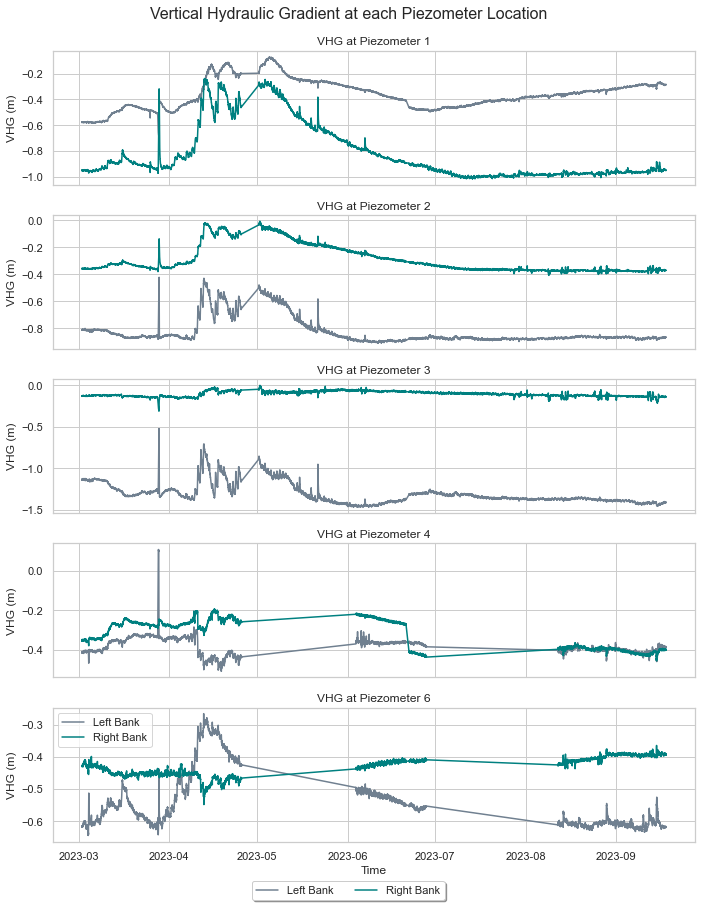

In [5]:
# create subplots with a white background
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12), sharex=True, facecolor='white')

# plot for Location at P1
sns.lineplot(data=P1_VHG, x='Date_Time', y='Left_VHG', color='slategray', linestyle='-', ax=axes[0])
sns.lineplot(data=P1_VHG, x='Date_Time', y='Right_VHG', color='teal', linestyle='-', ax=axes[0])
axes[0].set_title('VHG at Piezometer 1')
axes[0].set_ylabel('VHG (m)')

# Plot for Location at P2
sns.lineplot(data=P2_VHG, x='Date_Time', y='Left_VHG', color='slategray', linestyle='-', ax=axes[1])
sns.lineplot(data=P2_VHG, x='Date_Time', y='Right_VHG', color='teal', linestyle='-', ax=axes[1])
axes[1].set_title('VHG at Piezometer 2')
axes[1].set_ylabel('VHG (m)')

# Plot for Location at P3
sns.lineplot(data=P3_VHG, x='Date_Time', y='Left_VHG', color='slategray', linestyle='-', ax=axes[2])
sns.lineplot(data=P3_VHG, x='Date_Time', y='Right_VHG', color='teal', linestyle='-', ax=axes[2])
axes[2].set_title('VHG at Piezometer 3')
axes[2].set_ylabel('VHG (m)')

# Plot for Location at P4
sns.lineplot(data=P4_VHG, x='Date_Time', y='Left_VHG', color='slategray', linestyle='-', ax=axes[3])
sns.lineplot(data=P4_VHG, x='Date_Time', y='Right_VHG', color='teal', linestyle='-', ax=axes[3])
axes[3].set_title('VHG at Piezometer 4')
axes[3].set_ylabel('VHG (m)')

# Plot for Location at P6
sns.lineplot(data=P6_VHG, x='Date_Time', y='Left_VHG', color='slategray', linestyle='-', ax=axes[4], label = 'Left Bank')
sns.lineplot(data=P6_VHG, x='Date_Time', y='Right_VHG', color='teal', linestyle='-', ax=axes[4], label = 'Right Bank')
axes[4].set_title('VHG at Piezometer 6')
axes[4].set_ylabel('VHG (m)')
axes[4].set_xlabel('Time')

# Adjust layout
plt.tight_layout()
fig.suptitle('Vertical Hydraulic Gradient at each Piezometer Location', fontsize=16, y=1.02)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncol=3)
plt.savefig('plots/GW_VHGs.jpg', dpi=900, bbox_inches='tight')
plt.show()

Calculate range by season

In [10]:
# define the date ranges for spring and summer
spring_start = '2023-03-01'
spring_end = '2023-06-20'
summer_start = '2023-06-21'
summer_end = '2023-09-17'

# filter data for spring and summer
def filter_seasonal_data(df, start_date, end_date):
    return df[(df['Date_Time'] >= start_date) & (df['Date_Time'] <= end_date)]

spring_data = {
    'P1': filter_seasonal_data(P1_VHG, spring_start, spring_end),
    'P2': filter_seasonal_data(P2_VHG, spring_start, spring_end),
    'P3': filter_seasonal_data(P3_VHG, spring_start, spring_end),
    'P4': filter_seasonal_data(P4_VHG, spring_start, spring_end),
    'P6': filter_seasonal_data(P6_VHG, spring_start, spring_end)
}

summer_data = {
    'P1': filter_seasonal_data(P1_VHG, summer_start, summer_end),
    'P2': filter_seasonal_data(P2_VHG, summer_start, summer_end),
    'P3': filter_seasonal_data(P3_VHG, summer_start, summer_end),
    'P4': filter_seasonal_data(P4_VHG, summer_start, summer_end),
    'P6': filter_seasonal_data(P6_VHG, summer_start, summer_end)
}

# function to calculate the range of VHG values
def calculate_vhg_stats(data):
    left_bank_mean = data['Left_VHG'].mean()
    left_bank_min = data['Left_VHG'].min()
    left_bank_max = data['Left_VHG'].max()
    
    right_bank_mean = data['Right_VHG'].mean()
    right_bank_min = data['Right_VHG'].min()
    right_bank_max = data['Right_VHG'].max()
    
    return {
        'left_mean': left_bank_mean,
        'left_min': left_bank_min,
        'left_max': left_bank_max,
        'right_mean': right_bank_mean,
        'right_min': right_bank_min,
        'right_max': right_bank_max
    }

# calculate and print the VHG range for each piezometer
for piezometer in ['P1', 'P2', 'P3', 'P4', 'P6']:
    spring_stats = calculate_vhg_stats(spring_data[piezometer])
    summer_stats = calculate_vhg_stats(summer_data[piezometer])
    
    print(f'{piezometer} - Spring Left Bank: Mean={spring_stats["left_mean"]}, Min={spring_stats["left_min"]}, Max={spring_stats["left_max"]}')
    print(f'{piezometer} - Spring Right Bank: Mean={spring_stats["right_mean"]}, Min={spring_stats["right_min"]}, Max={spring_stats["right_max"]}')
    print(f'{piezometer} - Summer Left Bank: Mean={summer_stats["left_mean"]}, Min={summer_stats["left_min"]}, Max={summer_stats["left_max"]}')
    print(f'{piezometer} - Summer Right Bank: Mean={summer_stats["right_mean"]}, Min={summer_stats["right_min"]}, Max={summer_stats["right_max"]}')

P1 - Spring Left Bank: Mean=-0.31865941044993334, Min=-0.677878999999848, Max=-0.07146699999975681
P1 - Spring Right Bank: Mean=-0.6530631548846072, Min=-0.9719770000001517, Max=-0.23931100000027072
P1 - Summer Left Bank: Mean=-0.38606501794568504, Min=-0.4962449999998171, Max=-0.26494899999988775
P1 - Summer Right Bank: Mean=-0.969291827472262, Min=-1.016454000000067, Max=-0.8823889999998755
P2 - Spring Left Bank: Mean=-0.7629864539120418, Min=-0.9096199999999044, Max=-0.4220260000001872
P2 - Spring Right Bank: Mean=-0.2087204820029139, Min=-0.38009599999986676, Max=-0.006247999999686726
P2 - Summer Left Bank: Mean=-0.8733051024793246, Min=-0.8983880000000681, Max=-0.8462689999996655
P2 - Summer Right Bank: Mean=-0.36160171607268277, Min=-0.40798799999993207, Max=-0.3067289999999048
P3 - Spring Left Bank: Mean=-1.2416270105950789, Min=-1.4674700000000485, Max=-0.5252199999999903
P3 - Spring Right Bank: Mean=-0.09492377014666442, Min=-0.31322099999988495, Max=-0.002707000000100379
P3 -

In [11]:
# Combine all data for left and right banks
all_spring_left = pd.concat([spring_data[p]['Left_VHG'] for p in spring_data])
all_spring_right = pd.concat([spring_data[p]['Right_VHG'] for p in spring_data])
all_summer_left = pd.concat([summer_data[p]['Left_VHG'] for p in summer_data])
all_summer_right = pd.concat([summer_data[p]['Right_VHG'] for p in summer_data])

# Calculate stats for all left and right banks combined
def calculate_combined_stats(data):
    return {
        'mean': data.mean(),
        'min': data.min(),
        'max': data.max()
    }

spring_left_stats = calculate_combined_stats(all_spring_left)
spring_right_stats = calculate_combined_stats(all_spring_right)
summer_left_stats = calculate_combined_stats(all_summer_left)
summer_right_stats = calculate_combined_stats(all_summer_right)

print(f'Spring Left Bank: Mean={spring_left_stats["mean"]}, Min={spring_left_stats["min"]}, Max={spring_left_stats["max"]}')
print(f'Spring Right Bank: Mean={spring_right_stats["mean"]}, Min={spring_right_stats["min"]}, Max={spring_right_stats["max"]}')
print(f'Summer Left Bank: Mean={summer_left_stats["mean"]}, Min={summer_left_stats["min"]}, Max={summer_left_stats["max"]}')
print(f'Summer Right Bank: Mean={summer_right_stats["mean"]}, Min={summer_right_stats["min"]}, Max={summer_right_stats["max"]}')

Spring Left Bank: Mean=-0.6783249267541351, Min=-1.4674700000000485, Max=0.10858800000005431
Spring Right Bank: Mean=-0.32944693993423, Min=-0.9719770000001517, Max=-0.002707000000100379
Summer Left Bank: Mean=-0.7712589615980556, Min=-1.4543770000000222, Max=-0.26494899999988775
Summer Right Bank: Mean=-0.46121979294318677, Min=-1.016454000000067, Max=-0.05727600000000166


Same but combining both left and right banks

In [12]:
# Function to calculate the mean, min, and max of combined VHG values
def calculate_combined_vhg_stats(data):
    combined_vhg = pd.concat([data['Left_VHG'], data['Right_VHG']])
    mean_vhg = combined_vhg.mean()
    min_vhg = combined_vhg.min()
    max_vhg = combined_vhg.max()
    
    return {
        'mean': mean_vhg,
        'min': min_vhg,
        'max': max_vhg
    }

# Calculate and print the combined VHG stats for each piezometer
for piezometer in ['P1', 'P2', 'P3', 'P4', 'P6']:
    spring_stats = calculate_combined_vhg_stats(spring_data[piezometer])
    summer_stats = calculate_combined_vhg_stats(summer_data[piezometer])
    
    print(f'{piezometer} - Spring Combined: Mean={spring_stats["mean"]}, Min={spring_stats["min"]}, Max={spring_stats["max"]}')
    print(f'{piezometer} - Summer Combined: Mean={summer_stats["mean"]}, Min={summer_stats["min"]}, Max={summer_stats["max"]}')

P1 - Spring Combined: Mean=-0.48584914812396407, Min=-0.9719770000001517, Max=-0.07146699999975681
P1 - Summer Combined: Mean=-0.6777472644003718, Min=-1.016454000000067, Max=-0.26494899999988775
P2 - Spring Combined: Mean=-0.48583335525075344, Min=-0.9096199999999044, Max=-0.006247999999686726
P2 - Summer Combined: Mean=-0.6173930099150019, Min=-0.8983880000000681, Max=-0.3067289999999048
P3 - Spring Combined: Mean=-0.6684002401103412, Min=-1.4674700000000485, Max=-0.002707000000100379
P3 - Summer Combined: Mean=-0.7373493249114293, Min=-1.4543770000000222, Max=-0.05727600000000166
P4 - Spring Combined: Mean=-0.31958265681265635, Min=-0.5087960000000749, Max=0.10858800000005431
P4 - Summer Combined: Mean=-0.40108366864532513, Min=-0.45953800000006595, Max=-0.35667899999998554
P6 - Spring Combined: Mean=-0.4730345428884298, Min=-0.6449389999997948, Max=-0.26516999999967084
P6 - Summer Combined: Mean=-0.5011598538135218, Min=-0.6346909999997479, Max=-0.3643480000000636


In [13]:
# Combine all data for left and right banks
all_spring_vhg = pd.concat([pd.concat([spring_data[p]['Left_VHG'], spring_data[p]['Right_VHG']]) for p in spring_data])
all_summer_vhg = pd.concat([pd.concat([summer_data[p]['Left_VHG'], summer_data[p]['Right_VHG']]) for p in summer_data])

# Calculate stats for all combined VHG values
def calculate_combined_stats(data):
    return {
        'mean': data.mean(),
        'min': data.min(),
        'max': data.max()
    }

spring_stats = calculate_combined_stats(all_spring_vhg)
summer_stats = calculate_combined_stats(all_summer_vhg)

print(f'Spring Combined: Mean={spring_stats["mean"]}, Min={spring_stats["min"]}, Max={spring_stats["max"]}')
print(f'Summer Combined: Mean={summer_stats["mean"]}, Min={summer_stats["min"]}, Max={summer_stats["max"]}')

Spring Combined: Mean=-0.5038980106795522, Min=-1.4674700000000485, Max=0.10858800000005431
Summer Combined: Mean=-0.6161993446672828, Min=-1.4543770000000222, Max=-0.05727600000000166
